# CART (Classification and Regression Trees)
- Target feature: ```play```
- We split the dataset based on the feature that has the minimum **gini impurity**.
- We keep repeating this process until the whole dataset is classified on the basis of the key feature.
## Gini Impurity of a dataset
$$\text{Gini Impurity(dataset)} = 1-\sum_{i=0}^n p_i^2$$
## Gini Impurity of a feature
$$\text{Gini Impurity(feature)} = \sum_{i=0}^n \text{Probability of }f_i\times\text{Gini Impurity}(\sigma_{f=f_i}\text{dataset})$$
- $p_i$ is the probability of being selected, of each of the unique values of the key feature. In our case, the key feature is ```play```.
- $f_i$ is the $i$-th unique value of that feature.
- $\text{Gini impurity of}\ f_i$ is the Gini impurity of the dataset, that has $f_i$ as that value for feature $f$, w.r.t. the key feature.

**Note:** Gini impurity is also called gini index.
# Importing libraries and datasets

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("./PlayTennis.csv")
key_feature = "play"

In [2]:
data

,weather,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


# Function to calculate gini impurity of a dataset

In [3]:
def gini_impurity(dataset, key = key_feature):
    categories = dataset[key].unique()
    total_no_obs = dataset.shape[0]
    
    impurity = 1.0
    for category in categories:
        number = dataset[dataset[key] == category].shape[0]
        prob = float(number) / float(total_no_obs)
        impurity -= (prob ** 2)

    return impurity

# Function to calculate gini impurity of a feature

In [4]:
def gini_impurity_feature(dataset, feature):
    categories = dataset[feature].unique()
    total_no_obs = dataset.shape[0]

    impurity = 0.0
    for category in categories:
        tmp_dataset = dataset[dataset[feature] == category]
        number = tmp_dataset.shape[0]
        prob = float(number) / float(total_no_obs)
        impurity += (prob * gini_impurity(tmp_dataset))

    return impurity

# Getting first root node

In [5]:
def genneate_gini_map(dataset):
    gini_index_map = {}
    columns = dataset.columns
    
    for col in columns:
        if col != key_feature:
            gini_index_map[col] = gini_impurity_feature(dataset, col)

    return gini_index_map

In [6]:
import json

gini_index_map = genneate_gini_map(data)
print(json.dumps(gini_index_map, indent = 4))

{
    "weather": 0.34285714285714286,
    "temp": 0.44047619047619047,
    "humidity": 0.3673469387755103,
    "windy": 0.42857142857142855
}


In [7]:
root_feature = min(zip(gini_index_map.values(), gini_index_map.keys()))[1]
print(f"First node: {root_feature}")

First node: weather


# First split

In [8]:
categories = data.weather.unique()

split_1 = []
for cat in categories:
    split_1.append(data[data.weather == cat])

In [9]:
split_1[0]

,weather,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [10]:
split_1[1]

,weather,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


In [11]:
split_1[2]

,weather,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


# Getting second root node

In [12]:
gini_index_map = genneate_gini_map(split_1[0])
print(json.dumps(gini_index_map, indent = 4))

{
    "weather": 0.48,
    "temp": 0.2,
    "humidity": 0.0,
    "windy": 0.4666666666666667
}


In [13]:
root_feature = min(zip(gini_index_map.values(), gini_index_map.keys()))[1]
print(f"Second node: {root_feature}")

Second node: humidity


# Second split

In [14]:
categories = data.humidity.unique()

split_2 = []
for cat in categories:
    split_2.append(split_1[0][split_1[0].humidity == cat])

In [15]:
split_2[0]

,weather,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [16]:
split_2[1]

,weather,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


# Getting third root node

In [17]:
gini_index_map = genneate_gini_map(split_1[2])
print(json.dumps(gini_index_map, indent = 4))

{
    "weather": 0.48,
    "temp": 0.4666666666666667,
    "humidity": 0.4666666666666667,
    "windy": 0.0
}


In [18]:
root_feature = min(zip(gini_index_map.values(), gini_index_map.keys()))[1]
print(f"Third node: {root_feature}")

Third node: windy


# Third split

In [19]:
categories = data.windy.unique()

split_3 = []
for cat in categories:
    split_3.append(split_1[2][split_1[2].windy == cat])

In [20]:
split_3[0]

,weather,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [21]:
split_3[1]

,weather,temp,humidity,windy,play
5,rainy,cool,normal,True,no
13,rainy,mild,high,True,no


# Decision tree diagram
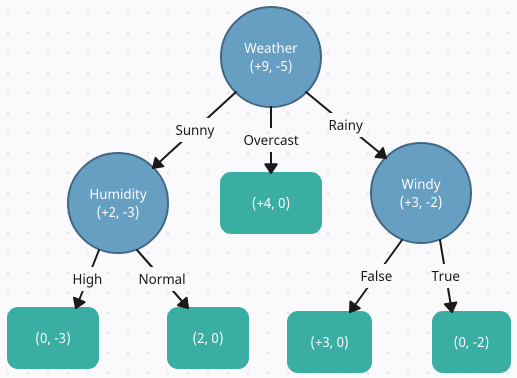

As you can see, it is the same decision tree as the one we got from ID3.
***